In [1]:
from kafka import KafkaConsumer
import time
import json
import queue
from IPython.display import clear_output

In [2]:
# This script receives messages from a Kafka topic
from kafka import KafkaConsumer

consumer = KafkaConsumer(
    "accidentes",
    bootstrap_servers="kafka-194e1e33-jose-30ef.aivencloud.com:26426",
    value_deserializer=lambda m: json.loads(m.decode('utf-8')),
    client_id="demo-client",
    group_id="demo-group",
    security_protocol="SSL",
    ssl_cafile="./cert/ca.pem",
    ssl_certfile="./cert/service.cert",
    ssl_keyfile="./cert/service.key"
)



In [13]:
"""
Presenta en pantalla los últimso 20 accidentes que se han producido
para que sean monitorizados
"""
NUM_ALERTS = 10
alerts=[None for i in range(NUM_ALERTS)] #inicializar las alertas
current = 0
while True:
    raw_msgs = consumer.poll(timeout_ms=1000, max_records=1)
    #print ('Poll ralizado, mensajes {}'.format(len(raw_msgs.items())))
    for tp, msgs in raw_msgs.items():
        #Limpia la salida de la celda para evitar el scroll
        #print ('cargar {} mensajes'.format(len(msgs)))
        for msg in msgs:
            #Elimina la alerta más antigua
            alerts.pop(0)
            #incluye en la cabecera
            alerts.append(msg.value)
        clear_output(wait=True)
        #Los elementos más nuevos están al final de la lista
        print ('Panel -----------------------------------------------------')
        for i in range(NUM_ALERTS-1,0,-1):
            if alerts[i] != None:
                print (alerts[i]['acc'],'-->',alerts[i]['calle'],alerts[i]['num'])
        print ('-----------------------------------------------------------')
    time.sleep(1)


Panel -----------------------------------------------------
2018/3 --> AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE NICETO ALCALA ZAMORA           
2018/3 --> AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE NICETO ALCALA ZAMORA           
2018/3 --> AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE NICETO ALCALA ZAMORA           
2018/3 --> AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE NICETO ALCALA ZAMORA           
2018/3 --> AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE NICETO ALCALA ZAMORA           
2018/3 --> AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE NICETO ALCALA ZAMORA           
2018/1 --> CALLE DE SAN BASILIO - CALLE DEL CRISTO DE LA VICTORIA 0
2018/1 --> CALLE DE SAN BASILIO - CALLE DEL CRISTO DE LA VICTORIA 0
2018/1 --> CALLE DE SAN BASILIO - CALLE DEL CRISTO DE LA VICTORIA 0
-----------------------------------------------------------


KeyboardInterrupt: 

In [9]:
i=0
for msg in consumer:
    #Elimina la alerta más antigua
    alerts.pop(0)
    #incluye en la cabecera
    alerts.append(msg.value)
    clear_output(wait=True)
    #Los elementos más nuevos están al final de la lista
    print ('Panel -----------------------------------------------------')
    for i in range(NUM_ALERTS-1,0,-1):
        if alerts[i] != None:
            print (alerts[i]['acc'],'-->',alerts[i]['calle'],alerts[i]['num'])
    print ('-----------------------------------------------------------')
    time.sleep(1)


KeyboardInterrupt: 

NameError: name 'Basemap' is not defined

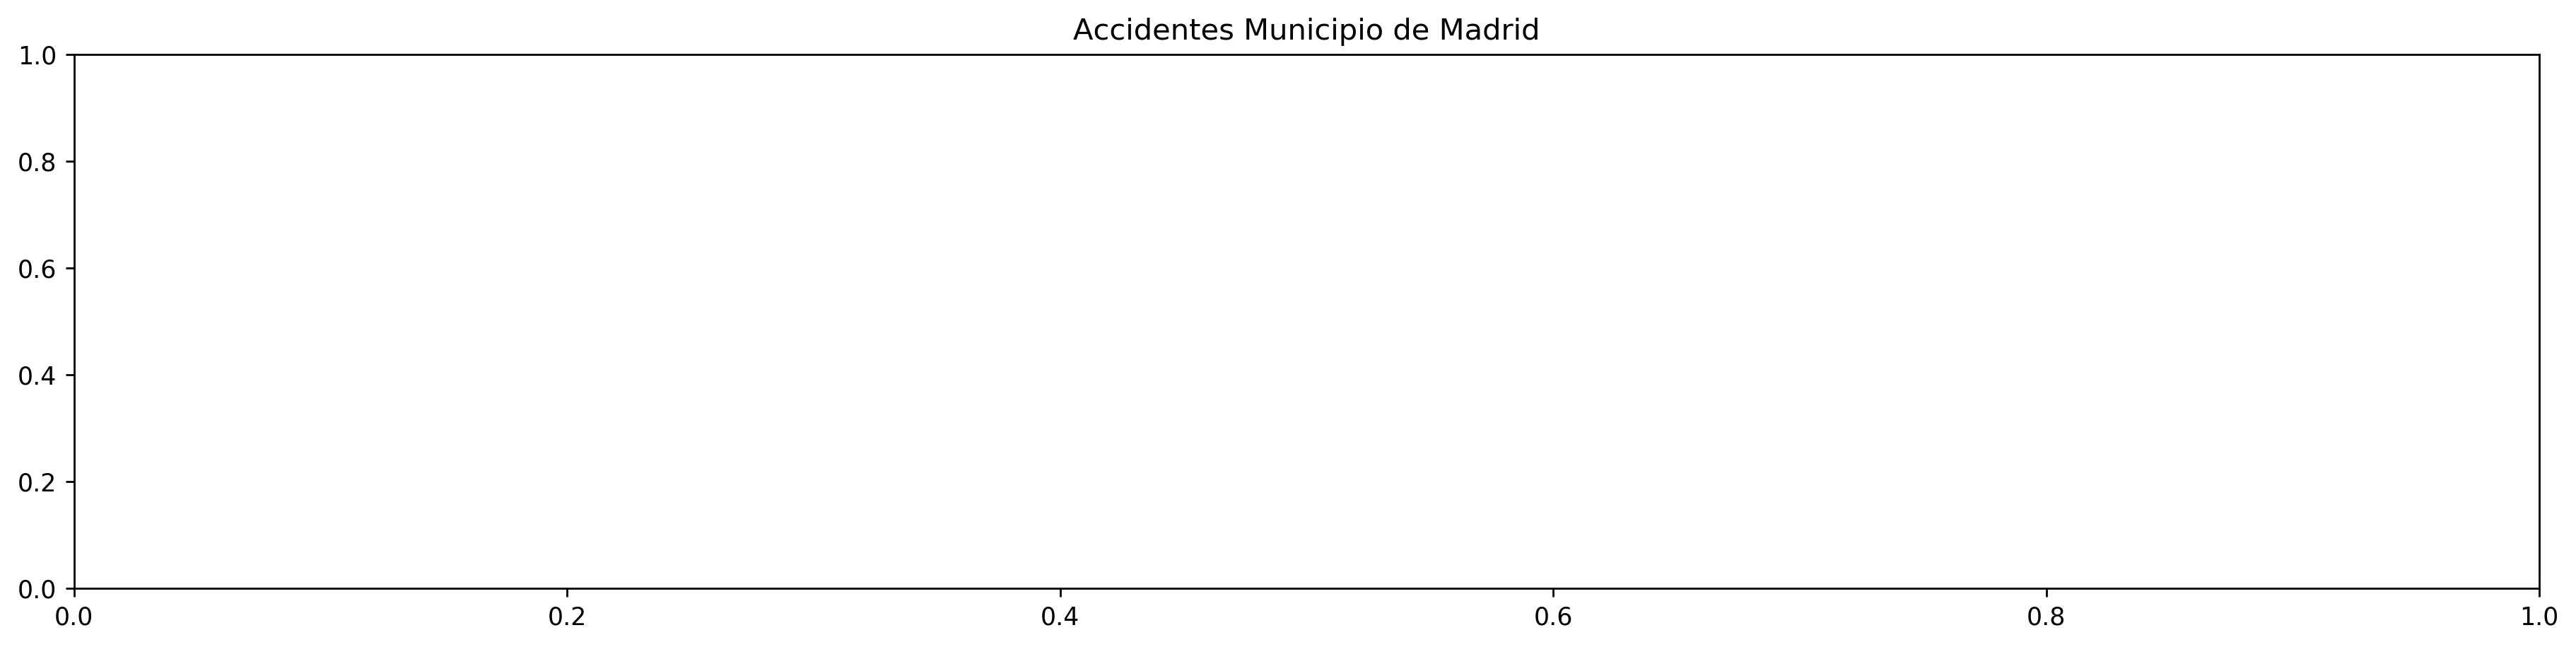

In [6]:
    
    
    

map



def makeMarker (cluster,lt,ln,numEventos,label,color):
    icono = ""
    text=""
    if numEventos > 1:
        folium.Marker([lt,ln],popup=str(numEventos)+' '+label+'s',
                      icon=folium.Icon(color=color,icon='glyphicon-plus')).add_to(cluster)
    else:
        folium.Marker([lt,ln],popup=label,icon=folium.Icon(color=color,icon=' ')).add_to(cluster)
    
points=[]
muertosCluster = MarkerCluster()
gravesCluster = MarkerCluster()
levesCluster = MarkerCluster()
i=0
for (calle, num, latitud, longitud), (accidentes,leves,graves,muertos) in df_points.iterrows():
    lt = float(latitud)
    ln = float(longitud)
    points.append([lt,ln])
    if muertos>0:
        makeMarker (muertosCluster,lt,ln,muertos,'Muerto','black')
    if graves>0:
        makeMarker (gravesCluster,lt,ln,graves,'Grave','darkred')
    if leves>0:
        makeMarker (levesCluster,lt,ln,leves,'Leve','green')
    i+=1

